In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, hstack
from astropy.io import fits
import pandas as pd
from edge_pydb.fitsextract import fitsextract, getlabels
from pyFIT3D.modelling.stellar import SSPModels

# SFH lum-to-mass conversion for old (CALIFA DR3) files

### The SSP table is `gsd01_156.fits` from https://gitlab.com/pipe3d/pyPipe3D/-/tree/master/examples/IFS_analysis/ssp

In [2]:
ssptable = '../../edge_pydb/img_califa/gsd01_156.fits'
models = SSPModels(ssptable)
nlumcols = models.n_models
print('Number of model steps:',nlumcols)
models.mass_to_light

Number of model steps: 156


array([  315.3872,   291.9658,   243.9794,   207.2634,   190.2229,   136.5368,   115.7582,   114.72  ,    66.427 ,    97.2151,   116.0299,    66.4746,   157.1888,   122.427 ,   132.766 ,   135.8752,
         189.5417,   201.6022,   292.6892,   295.2673,   322.0321,   333.6477,   325.5444,   325.6963,   394.1697,   371.9577,   384.974 ,   386.201 ,   470.8768,   431.5008,   496.1447,   497.5179,
         491.1587,   459.9698,   557.3052,   550.9384,   230.5454,   283.9994,   286.5627,   287.0202,   530.439 ,   540.0581,   629.4448,   613.433 ,   570.9965,   613.0018,   762.0727,   704.6415,
         667.7099,   718.1445,   787.1223,   781.2698,   833.125 ,   863.5545,   880.8278,  1069.107 ,   899.4571,   915.8245,   981.8328,  1143.3355,   879.9026,   910.9414,   952.3879,  1140.1382,
         953.6515,   968.2909,  1051.7403,  1207.8362,  1190.5411,  1236.1289,  1369.0163,  1507.4632,  1121.0823,  1251.5827,  1467.0962,  1601.8776,  1295.5732,  1436.08  ,  1699.1251,  1827.6995,
     

## Read and process the FITS file

In [3]:
gname = 'NGC5485'
fitsdir = '../../edge_pydb/img_califa/fits_natv_carma/'
cafile = os.path.join(fitsdir,gname+'.SFH.cube.fits.gz')
cadat, cahd = fits.getdata(cafile, header=True, ignore_missing_end=True)
zsel, labels, units, nsel, has_errors, fluxlike = getlabels('SFH', p3dstruct='califa')

In [4]:
sfh = fitsextract(cadat, header=cahd, keepnan=True, stride=[3,3,1], 
                  bunit=units, col_lbl=labels, zselect=zsel, 
                  first=False, use_hexgrid=False)

RA ref is 211.79679265
DEC ref is 55.00155011
This is an image of shape (398, 73, 77)


Axis 1: crpix=41.0
Axis 2: crpix=33.0
Remainder:  [1, 2, 0]


## The original SFH table has a column for each age-metallicity pair

In [5]:
print(len(sfh.colnames), sfh.colnames)

400 ['ix', 'iy', 'lumfrac_age_0.0010_met_0.0037', 'lumfrac_age_0.0010_met_0.0076', 'lumfrac_age_0.0010_met_0.0190', 'lumfrac_age_0.0010_met_0.0315', 'lumfrac_age_0.0040_met_0.0037', 'lumfrac_age_0.0040_met_0.0076', 'lumfrac_age_0.0040_met_0.0190', 'lumfrac_age_0.0040_met_0.0315', 'lumfrac_age_0.0030_met_0.0037', 'lumfrac_age_0.0030_met_0.0076', 'lumfrac_age_0.0030_met_0.0190', 'lumfrac_age_0.0030_met_0.0315', 'lumfrac_age_0.0056_met_0.0037', 'lumfrac_age_0.0056_met_0.0076', 'lumfrac_age_0.0056_met_0.0190', 'lumfrac_age_0.0056_met_0.0315', 'lumfrac_age_0.0089_met_0.0037', 'lumfrac_age_0.0089_met_0.0076', 'lumfrac_age_0.0089_met_0.0190', 'lumfrac_age_0.0089_met_0.0315', 'lumfrac_age_0.0126_met_0.0037', 'lumfrac_age_0.0126_met_0.0076', 'lumfrac_age_0.0126_met_0.0190', 'lumfrac_age_0.0126_met_0.0315', 'lumfrac_age_0.0141_met_0.0037', 'lumfrac_age_0.0141_met_0.0076', 'lumfrac_age_0.0141_met_0.0190', 'lumfrac_age_0.0141_met_0.0315', 'lumfrac_age_0.0178_met_0.0037', 'lumfrac_age_0.0178_met_0.

### In addition to ix and iy there are 398 columns in the table.  With 39 ages and 4 metallicities there are 39x4 = 156 luminosity fraction columns.  An additional 39+4 = 43 columns aggregate over age and metallicity respectively.  This yields 199 columns, which with corresponding error columns yields 199*2 = 398.

## Derive mass fraction columns from the luminosity fraction columns.

In [6]:
idx0 = 2
lumcols = Table(sfh.columns[idx0:idx0+nlumcols])
lumcols

lumfrac_age_0.0010_met_0.0037,lumfrac_age_0.0010_met_0.0076,lumfrac_age_0.0010_met_0.0190,lumfrac_age_0.0010_met_0.0315,lumfrac_age_0.0040_met_0.0037,lumfrac_age_0.0040_met_0.0076,lumfrac_age_0.0040_met_0.0190,lumfrac_age_0.0040_met_0.0315,lumfrac_age_0.0030_met_0.0037,lumfrac_age_0.0030_met_0.0076,lumfrac_age_0.0030_met_0.0190,lumfrac_age_0.0030_met_0.0315,lumfrac_age_0.0056_met_0.0037,lumfrac_age_0.0056_met_0.0076,lumfrac_age_0.0056_met_0.0190,lumfrac_age_0.0056_met_0.0315,lumfrac_age_0.0089_met_0.0037,lumfrac_age_0.0089_met_0.0076,lumfrac_age_0.0089_met_0.0190,lumfrac_age_0.0089_met_0.0315,lumfrac_age_0.0126_met_0.0037,lumfrac_age_0.0126_met_0.0076,lumfrac_age_0.0126_met_0.0190,lumfrac_age_0.0126_met_0.0315,lumfrac_age_0.0141_met_0.0037,lumfrac_age_0.0141_met_0.0076,lumfrac_age_0.0141_met_0.0190,lumfrac_age_0.0141_met_0.0315,lumfrac_age_0.0178_met_0.0037,lumfrac_age_0.0178_met_0.0076,lumfrac_age_0.0178_met_0.0190,lumfrac_age_0.0178_met_0.0315,lumfrac_age_0.0199_met_0.0037,lumfrac_age_0.0199_met_0.0076,lumfrac_age_0.0199_met_0.0190,lumfrac_age_0.0199_met_0.0315,lumfrac_age_0.0100_met_0.0037,lumfrac_age_0.0100_met_0.0076,lumfrac_age_0.0100_met_0.0190,lumfrac_age_0.0100_met_0.0315,lumfrac_age_0.0251_met_0.0037,lumfrac_age_0.0251_met_0.0076,lumfrac_age_0.0251_met_0.0190,lumfrac_age_0.0251_met_0.0315,lumfrac_age_0.0316_met_0.0037,lumfrac_age_0.0316_met_0.0076,lumfrac_age_0.0316_met_0.0190,lumfrac_age_0.0316_met_0.0315,lumfrac_age_0.0398_met_0.0037,lumfrac_age_0.0398_met_0.0076,lumfrac_age_0.0398_met_0.0190,lumfrac_age_0.0398_met_0.0315,lumfrac_age_0.0562_met_0.0037,lumfrac_age_0.0562_met_0.0076,lumfrac_age_0.0562_met_0.0190,lumfrac_age_0.0562_met_0.0315,lumfrac_age_0.0631_met_0.0037,lumfrac_age_0.0631_met_0.0076,lumfrac_age_0.0631_met_0.0190,lumfrac_age_0.0631_met_0.0315,lumfrac_age_0.0630_met_0.0037,lumfrac_age_0.0630_met_0.0076,lumfrac_age_0.0630_met_0.0190,lumfrac_age_0.0630_met_0.0315,lumfrac_age_0.0708_met_0.0037,lumfrac_age_0.0708_met_0.0076,lumfrac_age_0.0708_met_0.0190,lumfrac_age_0.0708_met_0.0315,lumfrac_age_0.1122_met_0.0037,lumfrac_age_0.1122_met_0.0076,lumfrac_age_0.1122_met_0.0190,lumfrac_age_0.1122_met_0.0315,lumfrac_age_0.1259_met_0.0037,lumfrac_age_0.1259_met_0.0076,lumfrac_age_0.1259_met_0.0190,lumfrac_age_0.1259_met_0.0315,lumfrac_age_0.1585_met_0.0037,lumfrac_age_0.1585_met_0.0076,lumfrac_age_0.1585_met_0.0190,lumfrac_age_0.1585_met_0.0315,lumfrac_age_0.1995_met_0.0037,lumfrac_age_0.1995_met_0.0076,lumfrac_age_0.1995_met_0.0190,lumfrac_age_0.1995_met_0.0315,lumfrac_age_0.1000_met_0.0037,lumfrac_age_0.1000_met_0.0076,lumfrac_age_0.1000_met_0.0190,lumfrac_age_0.1000_met_0.0315,lumfrac_age_0.2818_met_0.0037,lumfrac_age_0.2818_met_0.0076,lumfrac_age_0.2818_met_0.0190,lumfrac_age_0.2818_met_0.0315,lumfrac_age_0.3548_met_0.0037,lumfrac_age_0.3548_met_0.0076,lumfrac_age_0.3548_met_0.0190,lumfrac_age_0.3548_met_0.0315,lumfrac_age_0.5012_met_0.0037,lumfrac_age_0.5012_met_0.0076,lumfrac_age_0.5012_met_0.0190,lumfrac_age_0.5012_met_0.0315,lumfrac_age_0.7079_met_0.0037,lumfrac_age_0.7079_met_0.0076,lumfrac_age_0.7079_met_0.0190,lumfrac_age_0.7079_met_0.0315,lumfrac_age_0.8913_met_0.0037,lumfrac_age_0.8913_met_0.0076,lumfrac_age_0.8913_met_0.0190,lumfrac_age_0.8913_met_0.0315,lumfrac_age_10.0000_met_0.0037,lumfrac_age_10.0000_met_0.0076,lumfrac_age_10.0000_met_0.0190,lumfrac_age_10.0000_met_0.0315,lumfrac_age_1.1220_met_0.0037,lumfrac_age_1.1220_met_0.0076,lumfrac_age_1.1220_met_0.0190,lumfrac_age_1.1220_met_0.0315,lumfrac_age_12.5893_met_0.0037,lumfrac_age_12.5893_met_0.0076,lumfrac_age_12.5893_met_0.0190,lumfrac_age_12.5893_met_0.0315,lumfrac_age_1.2589_met_0.0037,lumfrac_age_1.2589_met_0.0076,lumfrac_age_1.2589_met_0.0190,lumfrac_age_1.2589_met_0.0315,lumfrac_age_14.1254_met_0.0037,lumfrac_age_14.1254_met_0.0076,lumfrac_age_14.1254_met_0.0190,lumfrac_age_14.1254_met_0.0315,lumfrac_age_1.4125_met_0.0037,lumfrac_age_1.4125_met_0.0076,lumfrac_age_1.4125_met_0.0190,lumfrac_age_1.4125_met_0.0315,lumfrac_age_1.9953_met_0.003

In [7]:
df_lum = lumcols.to_pandas()
df_lum

,lumfrac_age_0.0010_met_0.0037,lumfrac_age_0.0010_met_0.0076,lumfrac_age_0.0010_met_0.0190,lumfrac_age_0.0010_met_0.0315,lumfrac_age_0.0040_met_0.0037,lumfrac_age_0.0040_met_0.0076,lumfrac_age_0.0040_met_0.0190,lumfrac_age_0.0040_met_0.0315,lumfrac_age_0.0030_met_0.0037,lumfrac_age_0.0030_met_0.0076,...,lumfrac_age_4.4668_met_0.0190,lumfrac_age_4.4668_met_0.0315,lumfrac_age_6.3096_met_0.0037,lumfrac_age_6.3096_met_0.0076,lumfrac_age_6.3096_met_0.0190,lumfrac_age_6.3096_met_0.0315,lumfrac_age_7.9433_met_0.0037,lumfrac_age_7.9433_met_0.0076,lumfrac_age_7.9433_met_0.0190,lumfrac_age_7.9433_met_0.0315
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_mass = df_lum.multiply(models.mass_to_light, axis='columns')
df_norm = df_mass.divide(df_mass.sum(axis=1), axis='index')
df_norm.columns = [x.replace('lum','mass') for x in list(df_norm.columns)]
df_norm

,massfrac_age_0.0010_met_0.0037,massfrac_age_0.0010_met_0.0076,massfrac_age_0.0010_met_0.0190,massfrac_age_0.0010_met_0.0315,massfrac_age_0.0040_met_0.0037,massfrac_age_0.0040_met_0.0076,massfrac_age_0.0040_met_0.0190,massfrac_age_0.0040_met_0.0315,massfrac_age_0.0030_met_0.0037,massfrac_age_0.0030_met_0.0076,...,massfrac_age_4.4668_met_0.0190,massfrac_age_4.4668_met_0.0315,massfrac_age_6.3096_met_0.0037,massfrac_age_6.3096_met_0.0076,massfrac_age_6.3096_met_0.0190,massfrac_age_6.3096_met_0.0315,massfrac_age_7.9433_met_0.0037,massfrac_age_7.9433_met_0.0076,massfrac_age_7.9433_met_0.0190,massfrac_age_7.9433_met_0.0315
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extract age and metallicity values from column labels

In [9]:
agecols = [s.split('_')[2] for s in df_norm.columns.values]
print('Ages:',agecols)
metcols = [s.split('_')[4] for s in df_norm.columns.values]
print('Metallicities:',metcols)

Ages: ['0.0010', '0.0010', '0.0010', '0.0010', '0.0040', '0.0040', '0.0040', '0.0040', '0.0030', '0.0030', '0.0030', '0.0030', '0.0056', '0.0056', '0.0056', '0.0056', '0.0089', '0.0089', '0.0089', '0.0089', '0.0126', '0.0126', '0.0126', '0.0126', '0.0141', '0.0141', '0.0141', '0.0141', '0.0178', '0.0178', '0.0178', '0.0178', '0.0199', '0.0199', '0.0199', '0.0199', '0.0100', '0.0100', '0.0100', '0.0100', '0.0251', '0.0251', '0.0251', '0.0251', '0.0316', '0.0316', '0.0316', '0.0316', '0.0398', '0.0398', '0.0398', '0.0398', '0.0562', '0.0562', '0.0562', '0.0562', '0.0631', '0.0631', '0.0631', '0.0631', '0.0630', '0.0630', '0.0630', '0.0630', '0.0708', '0.0708', '0.0708', '0.0708', '0.1122', '0.1122', '0.1122', '0.1122', '0.1259', '0.1259', '0.1259', '0.1259', '0.1585', '0.1585', '0.1585', '0.1585', '0.1995', '0.1995', '0.1995', '0.1995', '0.1000', '0.1000', '0.1000', '0.1000', '0.2818', '0.2818', '0.2818', '0.2818', '0.3548', '0.3548', '0.3548', '0.3548', '0.5012', '0.5012', '0.5012', '0.

## Aggregate the mass fractions by age.  Reorder them by increasing age.

In [10]:
df_age = (df_norm.T).groupby(agecols, sort=False).sum(min_count=1).T
df_age = df_age.reindex(sorted(df_age.columns, key=float), axis=1)
sort_ages = list(df_age.columns)
df_age.columns = ['massfrac_age_'+x for x in sort_ages]
df_age

,massfrac_age_0.0010,massfrac_age_0.0030,massfrac_age_0.0040,massfrac_age_0.0056,massfrac_age_0.0089,massfrac_age_0.0100,massfrac_age_0.0126,massfrac_age_0.0141,massfrac_age_0.0178,massfrac_age_0.0199,...,massfrac_age_1.4125,massfrac_age_1.9953,massfrac_age_2.5119,massfrac_age_3.5481,massfrac_age_4.4668,massfrac_age_6.3096,massfrac_age_7.9433,massfrac_age_10.0000,massfrac_age_12.5893,massfrac_age_14.1254
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Sample row
df_age.loc[200]

massfrac_age_0.0010     0.000000
massfrac_age_0.0030     0.000000
massfrac_age_0.0040     0.000000
massfrac_age_0.0056     0.000000
massfrac_age_0.0089     0.000000
massfrac_age_0.0100     0.000000
massfrac_age_0.0126     0.000042
massfrac_age_0.0141     0.000000
massfrac_age_0.0178     0.000042
massfrac_age_0.0199     0.000030
massfrac_age_0.0251     0.000000
massfrac_age_0.0316     0.000000
massfrac_age_0.0398     0.000059
massfrac_age_0.0562     0.000000
massfrac_age_0.0630     0.000118
massfrac_age_0.0631     0.000000
massfrac_age_0.0708     0.000000
massfrac_age_0.1000     0.000000
massfrac_age_0.1122     0.000000
massfrac_age_0.1259     0.000000
massfrac_age_0.1585     0.000000
massfrac_age_0.1995     0.000000
massfrac_age_0.2818     0.000000
massfrac_age_0.3548     0.000000
massfrac_age_0.5012     0.000000
massfrac_age_0.7079     0.000446
massfrac_age_0.8913     0.000000
massfrac_age_1.1220     0.000000
massfrac_age_1.2589     0.000000
massfrac_age_1.4125     0.000300
massfrac_a

## Aggregate the mass fractions by metallicity.

In [12]:
df_met = (df_norm.T).groupby(metcols).sum(min_count=1).T
sort_mets = list(df_met.columns)
df_met.columns = ['massfrac_met_'+x for x in sort_mets]
df_met

,massfrac_met_0.0037,massfrac_met_0.0076,massfrac_met_0.0190,massfrac_met_0.0315
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
619,NaN,NaN,NaN,NaN
620,NaN,NaN,NaN,NaN
621,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN


In [13]:
# Sample row
df_met.loc[200]

massfrac_met_0.0037    0.166411
massfrac_met_0.0076    0.000496
massfrac_met_0.0190    0.000441
massfrac_met_0.0315    0.832653
Name: 200, dtype: float64

## Append the aggregated mass fraction columns to the table.

In [14]:
t_mass_age = Table.from_pandas(df_age.astype(np.float32))
t_mass_met = Table.from_pandas(df_met.astype(np.float32))
sfh_new = hstack([sfh, t_mass_age.filled(np.nan), t_mass_met.filled(np.nan)], join_type='exact')
sfh_new

ix,iy,lumfrac_age_0.0010_met_0.0037,lumfrac_age_0.0010_met_0.0076,lumfrac_age_0.0010_met_0.0190,lumfrac_age_0.0010_met_0.0315,lumfrac_age_0.0040_met_0.0037,lumfrac_age_0.0040_met_0.0076,lumfrac_age_0.0040_met_0.0190,lumfrac_age_0.0040_met_0.0315,lumfrac_age_0.0030_met_0.0037,lumfrac_age_0.0030_met_0.0076,lumfrac_age_0.0030_met_0.0190,lumfrac_age_0.0030_met_0.0315,lumfrac_age_0.0056_met_0.0037,lumfrac_age_0.0056_met_0.0076,lumfrac_age_0.0056_met_0.0190,lumfrac_age_0.0056_met_0.0315,lumfrac_age_0.0089_met_0.0037,lumfrac_age_0.0089_met_0.0076,lumfrac_age_0.0089_met_0.0190,lumfrac_age_0.0089_met_0.0315,lumfrac_age_0.0126_met_0.0037,lumfrac_age_0.0126_met_0.0076,lumfrac_age_0.0126_met_0.0190,lumfrac_age_0.0126_met_0.0315,lumfrac_age_0.0141_met_0.0037,lumfrac_age_0.0141_met_0.0076,lumfrac_age_0.0141_met_0.0190,lumfrac_age_0.0141_met_0.0315,lumfrac_age_0.0178_met_0.0037,lumfrac_age_0.0178_met_0.0076,lumfrac_age_0.0178_met_0.0190,lumfrac_age_0.0178_met_0.0315,lumfrac_age_0.0199_met_0.0037,lumfrac_age_0.0199_met_0.0076,lumfrac_age_0.0199_met_0.0190,lumfrac_age_0.0199_met_0.0315,lumfrac_age_0.0100_met_0.0037,lumfrac_age_0.0100_met_0.0076,lumfrac_age_0.0100_met_0.0190,lumfrac_age_0.0100_met_0.0315,lumfrac_age_0.0251_met_0.0037,lumfrac_age_0.0251_met_0.0076,lumfrac_age_0.0251_met_0.0190,lumfrac_age_0.0251_met_0.0315,lumfrac_age_0.0316_met_0.0037,lumfrac_age_0.0316_met_0.0076,lumfrac_age_0.0316_met_0.0190,lumfrac_age_0.0316_met_0.0315,lumfrac_age_0.0398_met_0.0037,lumfrac_age_0.0398_met_0.0076,lumfrac_age_0.0398_met_0.0190,lumfrac_age_0.0398_met_0.0315,lumfrac_age_0.0562_met_0.0037,lumfrac_age_0.0562_met_0.0076,lumfrac_age_0.0562_met_0.0190,lumfrac_age_0.0562_met_0.0315,lumfrac_age_0.0631_met_0.0037,lumfrac_age_0.0631_met_0.0076,lumfrac_age_0.0631_met_0.0190,lumfrac_age_0.0631_met_0.0315,lumfrac_age_0.0630_met_0.0037,lumfrac_age_0.0630_met_0.0076,lumfrac_age_0.0630_met_0.0190,lumfrac_age_0.0630_met_0.0315,lumfrac_age_0.0708_met_0.0037,lumfrac_age_0.0708_met_0.0076,lumfrac_age_0.0708_met_0.0190,lumfrac_age_0.0708_met_0.0315,lumfrac_age_0.1122_met_0.0037,lumfrac_age_0.1122_met_0.0076,lumfrac_age_0.1122_met_0.0190,lumfrac_age_0.1122_met_0.0315,lumfrac_age_0.1259_met_0.0037,lumfrac_age_0.1259_met_0.0076,lumfrac_age_0.1259_met_0.0190,lumfrac_age_0.1259_met_0.0315,lumfrac_age_0.1585_met_0.0037,lumfrac_age_0.1585_met_0.0076,lumfrac_age_0.1585_met_0.0190,lumfrac_age_0.1585_met_0.0315,lumfrac_age_0.1995_met_0.0037,lumfrac_age_0.1995_met_0.0076,lumfrac_age_0.1995_met_0.0190,lumfrac_age_0.1995_met_0.0315,lumfrac_age_0.1000_met_0.0037,lumfrac_age_0.1000_met_0.0076,lumfrac_age_0.1000_met_0.0190,lumfrac_age_0.1000_met_0.0315,lumfrac_age_0.2818_met_0.0037,lumfrac_age_0.2818_met_0.0076,lumfrac_age_0.2818_met_0.0190,lumfrac_age_0.2818_met_0.0315,lumfrac_age_0.3548_met_0.0037,lumfrac_age_0.3548_met_0.0076,lumfrac_age_0.3548_met_0.0190,lumfrac_age_0.3548_met_0.0315,lumfrac_age_0.5012_met_0.0037,lumfrac_age_0.5012_met_0.0076,lumfrac_age_0.5012_met_0.0190,lumfrac_age_0.5012_met_0.0315,lumfrac_age_0.7079_met_0.0037,lumfrac_age_0.7079_met_0.0076,lumfrac_age_0.7079_met_0.0190,lumfrac_age_0.7079_met_0.0315,lumfrac_age_0.8913_met_0.0037,lumfrac_age_0.8913_met_0.0076,lumfrac_age_0.8913_met_0.0190,lumfrac_age_0.8913_met_0.0315,lumfrac_age_10.0000_met_0.0037,lumfrac_age_10.0000_met_0.0076,lumfrac_age_10.0000_met_0.0190,lumfrac_age_10.0000_met_0.0315,lumfrac_age_1.1220_met_0.0037,lumfrac_age_1.1220_met_0.0076,lumfrac_age_1.1220_met_0.0190,lumfrac_age_1.1220_met_0.0315,lumfrac_age_12.5893_met_0.0037,lumfrac_age_12.5893_met_0.0076,lumfrac_age_12.5893_met_0.0190,lumfrac_age_12.5893_met_0.0315,lumfrac_age_1.2589_met_0.0037,lumfrac_age_1.2589_met_0.0076,lumfrac_age_1.2589_met_0.0190,lumfrac_age_1.2589_met_0.0315,lumfrac_age_14.1254_met_0.0037,lumfrac_age_14.1254_met_0.0076,lumfrac_age_14.1254_met_0.0190,lumfrac_age_14.1254_met_0.0315,lumfrac_age_1.4125_met_0.0037,lumfrac_age_1.4125_met_0.0076,lumfrac_age_1.4125_met_0.0190,lumfrac_age_1.4125_met_0.0315,lumfrac_age_1.9953_met

## Add a column representing the fraction of young (<33 Myr) stars

In [15]:
sublist = (np.array(sort_ages, dtype=float) < 0.035)
sublist

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False, False, False])

In [16]:
f_young = np.array(df_age[df_age.columns.values[sublist]].sum(axis=1, min_count=1).astype(np.float32))
sfh_new.add_column(f_young, name='f_young')
sfh_new['f_young'].description='total mass fraction < 33 Myr'
sfh_new

ix,iy,lumfrac_age_0.0010_met_0.0037,lumfrac_age_0.0010_met_0.0076,lumfrac_age_0.0010_met_0.0190,lumfrac_age_0.0010_met_0.0315,lumfrac_age_0.0040_met_0.0037,lumfrac_age_0.0040_met_0.0076,lumfrac_age_0.0040_met_0.0190,lumfrac_age_0.0040_met_0.0315,lumfrac_age_0.0030_met_0.0037,lumfrac_age_0.0030_met_0.0076,lumfrac_age_0.0030_met_0.0190,lumfrac_age_0.0030_met_0.0315,lumfrac_age_0.0056_met_0.0037,lumfrac_age_0.0056_met_0.0076,lumfrac_age_0.0056_met_0.0190,lumfrac_age_0.0056_met_0.0315,lumfrac_age_0.0089_met_0.0037,lumfrac_age_0.0089_met_0.0076,lumfrac_age_0.0089_met_0.0190,lumfrac_age_0.0089_met_0.0315,lumfrac_age_0.0126_met_0.0037,lumfrac_age_0.0126_met_0.0076,lumfrac_age_0.0126_met_0.0190,lumfrac_age_0.0126_met_0.0315,lumfrac_age_0.0141_met_0.0037,lumfrac_age_0.0141_met_0.0076,lumfrac_age_0.0141_met_0.0190,lumfrac_age_0.0141_met_0.0315,lumfrac_age_0.0178_met_0.0037,lumfrac_age_0.0178_met_0.0076,lumfrac_age_0.0178_met_0.0190,lumfrac_age_0.0178_met_0.0315,lumfrac_age_0.0199_met_0.0037,lumfrac_age_0.0199_met_0.0076,lumfrac_age_0.0199_met_0.0190,lumfrac_age_0.0199_met_0.0315,lumfrac_age_0.0100_met_0.0037,lumfrac_age_0.0100_met_0.0076,lumfrac_age_0.0100_met_0.0190,lumfrac_age_0.0100_met_0.0315,lumfrac_age_0.0251_met_0.0037,lumfrac_age_0.0251_met_0.0076,lumfrac_age_0.0251_met_0.0190,lumfrac_age_0.0251_met_0.0315,lumfrac_age_0.0316_met_0.0037,lumfrac_age_0.0316_met_0.0076,lumfrac_age_0.0316_met_0.0190,lumfrac_age_0.0316_met_0.0315,lumfrac_age_0.0398_met_0.0037,lumfrac_age_0.0398_met_0.0076,lumfrac_age_0.0398_met_0.0190,lumfrac_age_0.0398_met_0.0315,lumfrac_age_0.0562_met_0.0037,lumfrac_age_0.0562_met_0.0076,lumfrac_age_0.0562_met_0.0190,lumfrac_age_0.0562_met_0.0315,lumfrac_age_0.0631_met_0.0037,lumfrac_age_0.0631_met_0.0076,lumfrac_age_0.0631_met_0.0190,lumfrac_age_0.0631_met_0.0315,lumfrac_age_0.0630_met_0.0037,lumfrac_age_0.0630_met_0.0076,lumfrac_age_0.0630_met_0.0190,lumfrac_age_0.0630_met_0.0315,lumfrac_age_0.0708_met_0.0037,lumfrac_age_0.0708_met_0.0076,lumfrac_age_0.0708_met_0.0190,lumfrac_age_0.0708_met_0.0315,lumfrac_age_0.1122_met_0.0037,lumfrac_age_0.1122_met_0.0076,lumfrac_age_0.1122_met_0.0190,lumfrac_age_0.1122_met_0.0315,lumfrac_age_0.1259_met_0.0037,lumfrac_age_0.1259_met_0.0076,lumfrac_age_0.1259_met_0.0190,lumfrac_age_0.1259_met_0.0315,lumfrac_age_0.1585_met_0.0037,lumfrac_age_0.1585_met_0.0076,lumfrac_age_0.1585_met_0.0190,lumfrac_age_0.1585_met_0.0315,lumfrac_age_0.1995_met_0.0037,lumfrac_age_0.1995_met_0.0076,lumfrac_age_0.1995_met_0.0190,lumfrac_age_0.1995_met_0.0315,lumfrac_age_0.1000_met_0.0037,lumfrac_age_0.1000_met_0.0076,lumfrac_age_0.1000_met_0.0190,lumfrac_age_0.1000_met_0.0315,lumfrac_age_0.2818_met_0.0037,lumfrac_age_0.2818_met_0.0076,lumfrac_age_0.2818_met_0.0190,lumfrac_age_0.2818_met_0.0315,lumfrac_age_0.3548_met_0.0037,lumfrac_age_0.3548_met_0.0076,lumfrac_age_0.3548_met_0.0190,lumfrac_age_0.3548_met_0.0315,lumfrac_age_0.5012_met_0.0037,lumfrac_age_0.5012_met_0.0076,lumfrac_age_0.5012_met_0.0190,lumfrac_age_0.5012_met_0.0315,lumfrac_age_0.7079_met_0.0037,lumfrac_age_0.7079_met_0.0076,lumfrac_age_0.7079_met_0.0190,lumfrac_age_0.7079_met_0.0315,lumfrac_age_0.8913_met_0.0037,lumfrac_age_0.8913_met_0.0076,lumfrac_age_0.8913_met_0.0190,lumfrac_age_0.8913_met_0.0315,lumfrac_age_10.0000_met_0.0037,lumfrac_age_10.0000_met_0.0076,lumfrac_age_10.0000_met_0.0190,lumfrac_age_10.0000_met_0.0315,lumfrac_age_1.1220_met_0.0037,lumfrac_age_1.1220_met_0.0076,lumfrac_age_1.1220_met_0.0190,lumfrac_age_1.1220_met_0.0315,lumfrac_age_12.5893_met_0.0037,lumfrac_age_12.5893_met_0.0076,lumfrac_age_12.5893_met_0.0190,lumfrac_age_12.5893_met_0.0315,lumfrac_age_1.2589_met_0.0037,lumfrac_age_1.2589_met_0.0076,lumfrac_age_1.2589_met_0.0190,lumfrac_age_1.2589_met_0.0315,lumfrac_age_14.1254_met_0.0037,lumfrac_age_14.1254_met_0.0076,lumfrac_age_14.1254_met_0.0190,lumfrac_age_14.1254_met_0.0315,lumfrac_age_1.4125_met_0.0037,lumfrac_age_1.4125_met_0.0076,lumfrac_age_1.4125_met_0.0190,lumfrac_age_1.4125_met_0.0315,lumfrac_age_1.9953_met

In [17]:
f_young[200]

0.00011383722

## Check the age aggregation

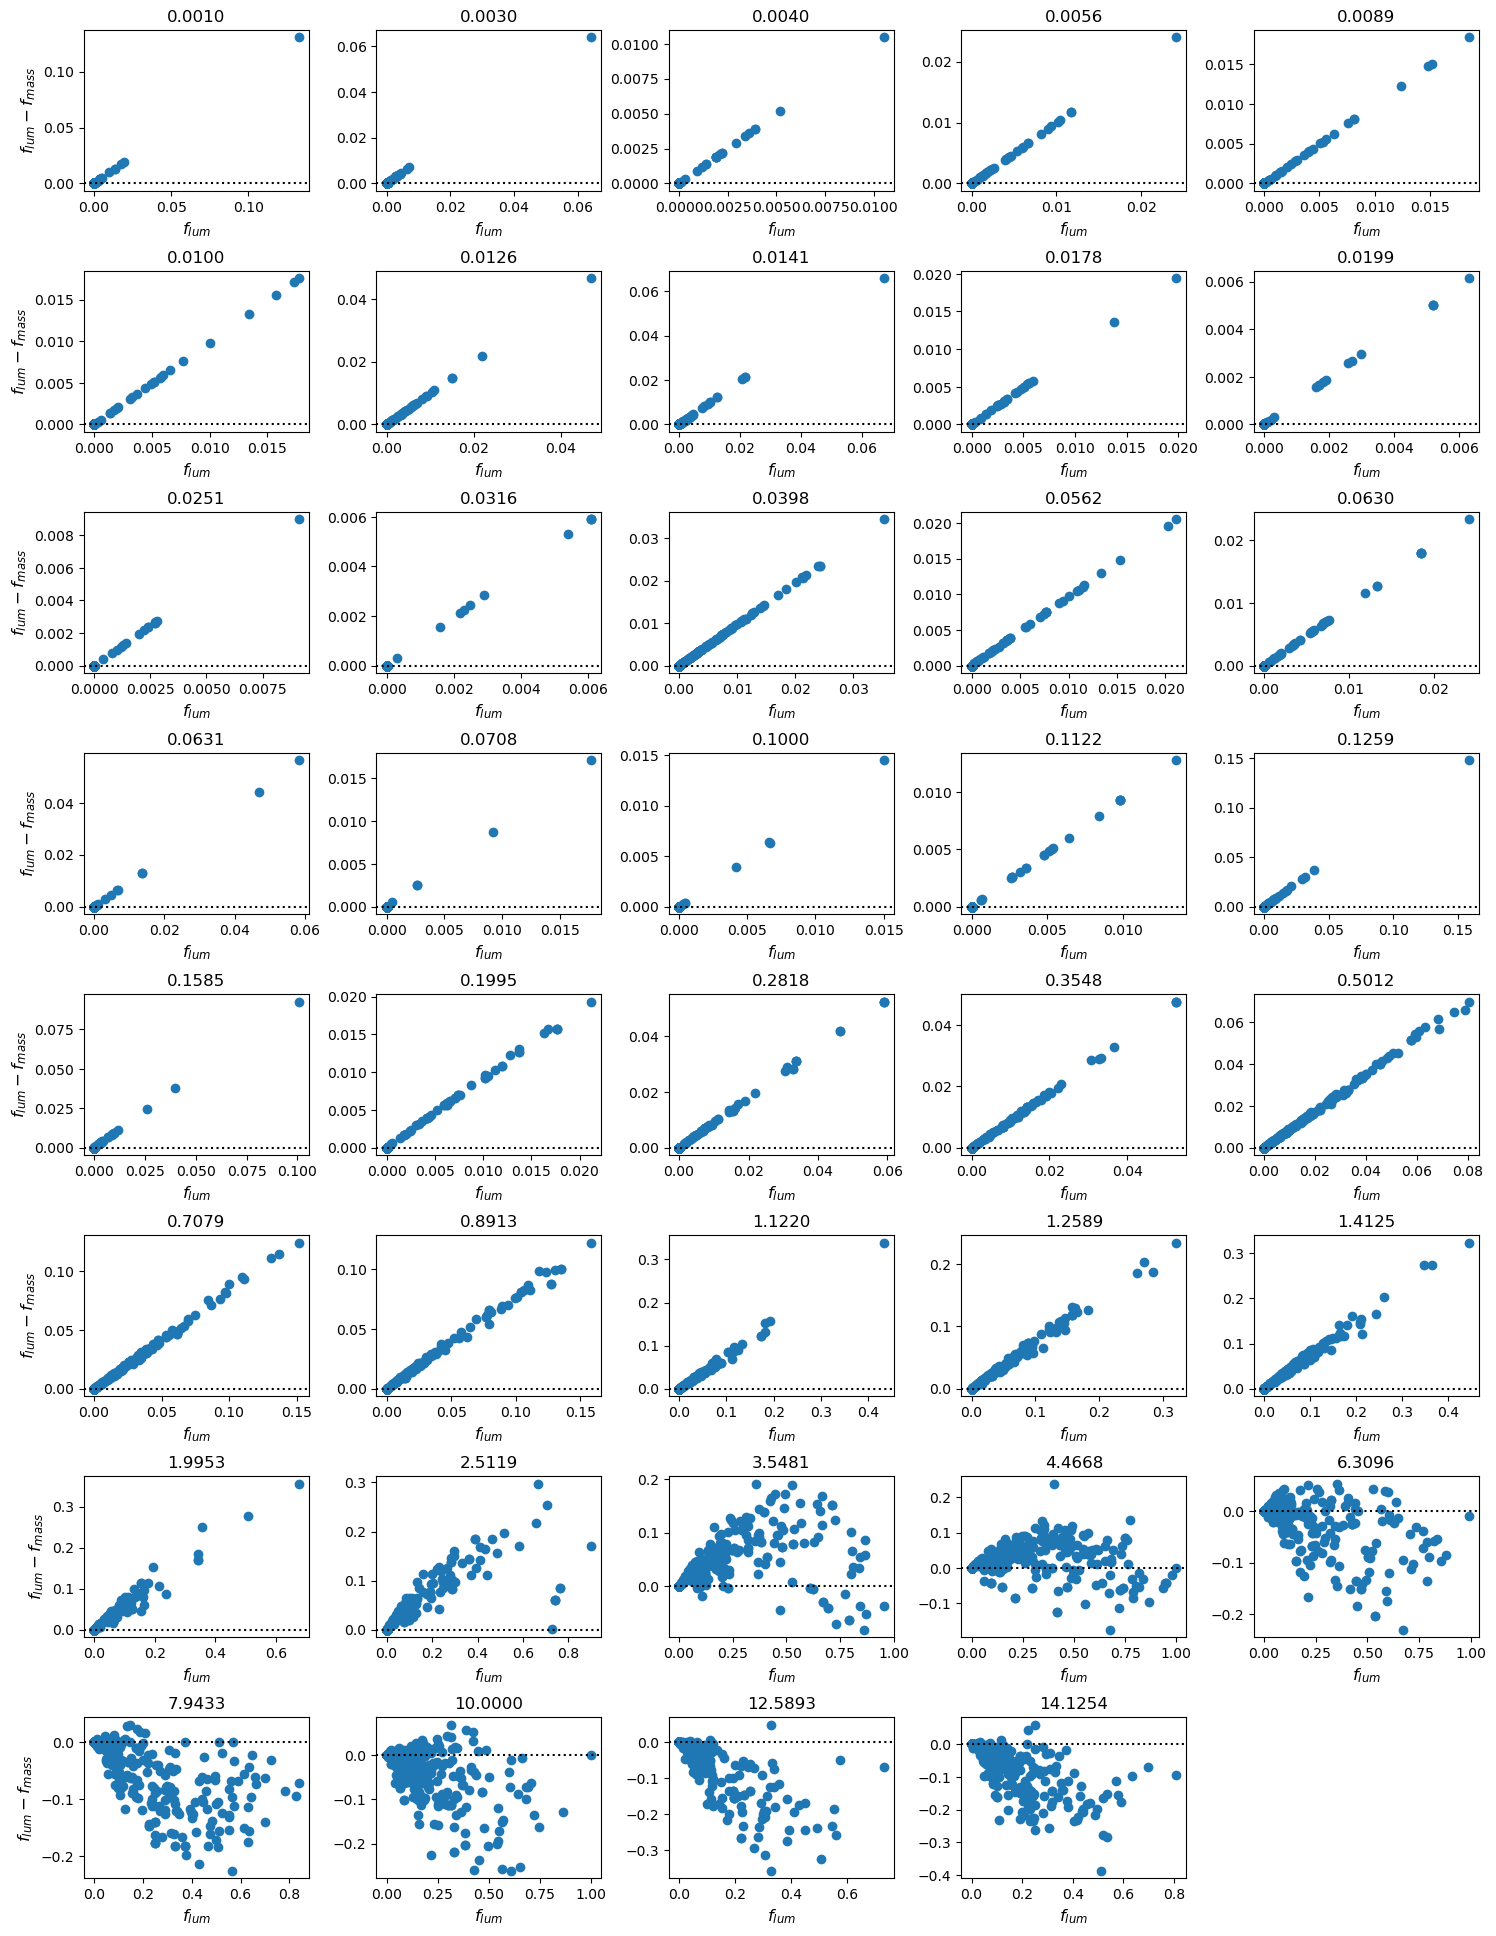

In [18]:
fig = plt.figure(figsize=(18,24))
for i, age in enumerate(sort_ages):
    ax = fig.add_subplot(8, 5, i+1)
    ax.scatter(sfh_new['lumfrac_age_'+age], sfh_new['lumfrac_age_'+age]-sfh_new['massfrac_age_'+age])
    ax.axhline(ls=':',color='k')
    ax.set_title(age)
    ax.set_xlabel(r'$f_{lum}$', fontsize='large')
    if i % 5 == 0:
        ax.set_ylabel(r'$f_{lum} - f_{mass}$', fontsize='large')
plt.subplots_adjust(hspace=0.5,wspace=0.3)

## Check the met aggregation

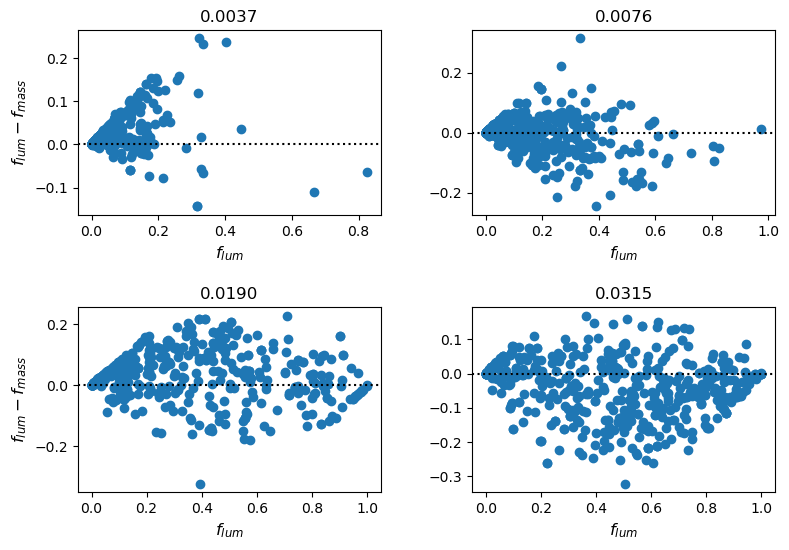

In [19]:
fig = plt.figure(figsize=(9,6))
for i, met in enumerate(sort_mets):
    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(sfh_new['lumfrac_met_'+met], sfh_new['lumfrac_met_'+met]-sfh_new['massfrac_met_'+met])
    ax.axhline(ls=':',color='k')
    ax.set_title(met)
    ax.set_xlabel(r'$f_{lum}$', fontsize='large')
    if i % 2 == 0:
        ax.set_ylabel(r'$f_{lum} - f_{mass}$', fontsize='large')
plt.subplots_adjust(hspace=0.5,wspace=0.3)